<div style="background-color:#013220; color:#f0f0f0; padding:20px; border-radius:10px; font-family:Arial, sans-serif; line-height:1.7;">
  <h2 style="color:#90EE90; text-align:center;">💡 Why This Project Matters</h2>
  <p>
    Brain tumors are among the most serious neurological conditions, often requiring early and accurate detection 
    for effective treatment. Medical imaging techniques like Magnetic Resonance Imaging (MRI) provide detailed 
    views of brain tissue, enabling doctors to identify abnormalities. However, manual inspection of MRI scans 
    can be <strong>time-consuming, prone to human error, and limited by specialist availability</strong>.
  </p>
  
  <p>
    In recent years, <em>deep learning</em> and <em>computer vision</em> have emerged as powerful allies to 
    healthcare professionals. By training models to automatically recognize patterns in MRI images, we can 
    create systems that assist radiologists in making faster and more consistent assessments, potentially 
    saving lives.
  </p>

  <h3 style="color:#ADFF2F;">🎯 Our Goal</h3>
  <p>
    The primary objective of this project is to develop a robust machine learning model capable of 
    <strong>classifying brain MRI scans into “tumor” or “no tumor” categories</strong>. This will involve 
    carefully preparing the dataset, applying state-of-the-art image processing techniques, and leveraging 
    transfer learning for improved accuracy on our relatively small dataset.
  </p>

  <h3 style="color:#ADFF2F;">🛠 Our Approach</h3>
  <p>
    We will progress through a structured pipeline: understanding the dataset, preprocessing and augmenting 
    images, designing and training a neural network, evaluating its performance with multiple metrics, and 
    finally, packaging the solution for deployment via an accessible API. Each step is designed with 
    <strong>real-world usability and medical ethics in mind</strong>.
  </p>

  <h3 style="color:#ADFF2F;">🌍 Impact</h3>
  <p>
    While this model alone won’t replace medical experts, it can serve as a valuable <em>decision-support tool</em>. 
    Hospitals with fewer resources could benefit from automated screening, and radiologists could use it 
    to double-check scans and reduce the risk of oversight. 
    Ultimately, our work aims to demonstrate how AI can complement — not replace — human expertise in a 
    mission as vital as saving lives.
  </p>
</div>


<div style="background-color:#013220; color:#f0f0f0; padding:20px; border-radius:10px; font-family:Arial, sans-serif; line-height:1.6;">
  <h2 style="color:#90EE90; text-align:center;">🧠 Brain MRI Tumor Detection – Project Roadmap</h2>

  <h3 style="color:#ADFF2F;">1️⃣ Data Loading & Exploration</h3>
  <ul>
    <li>Load MRI images from <code>yes/</code> and <code>no/</code> folders.</li>
    <li>Inspect image counts per class.</li>
    <li>Visualize a few positive & negative samples.</li>
    <li>Check image resolution & quality.</li>
  </ul>

  <h3 style="color:#ADFF2F;">2️⃣ Preprocessing</h3>
  <ul>
    <li>Resize images to standard size (e.g., 224x224).</li>
    <li>Normalize pixel values to 0–1 range.</li>
    <li>Apply data augmentation (rotate, zoom, flip).</li>
    <li>Split into train/validation/test sets.</li>
  </ul>

  <h3 style="color:#ADFF2F;">3️⃣ Modeling</h3>
  <ul>
    <li>Use Transfer Learning (ResNet, VGG16, EfficientNet).</li>
    <li>Fine-tune layers for MRI-specific features.</li>
    <li>Use binary classification (sigmoid activation).</li>
    <li>Incorporate dropout & regularization to avoid overfitting.</li>
  </ul>

  <h3 style="color:#ADFF2F;">4️⃣ Evaluation</h3>
  <ul>
    <li>Calculate accuracy, precision, recall, F1-score.</li>
    <li>Plot confusion matrix.</li>
    <li>Check ROC curve & AUC score.</li>
    <li>Prioritize sensitivity (recall) for tumor detection.</li>
  </ul>

  <h3 style="color:#ADFF2F;">5️⃣ Deployment (maybe)</h3>
  <ul>
    <li>Save trained model (<code>.h5</code> or <code>.pth</code>).</li>
    <li>Build inference API with FastAPI.</li>
    <li>Optionally add web UI for image upload & prediction.</li>
    <li>Document usage & limitations clearly.</li>
  </ul>
</div>


Number of tumor images: 155
Number of non-tumor images: 92


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


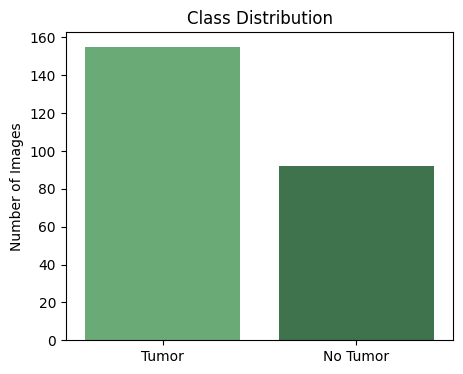

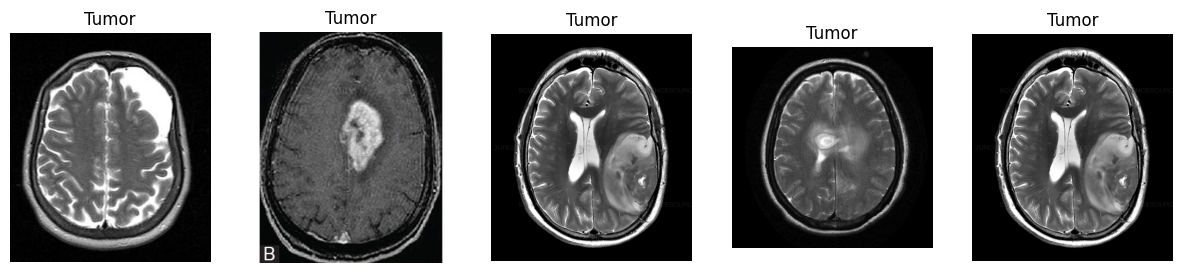

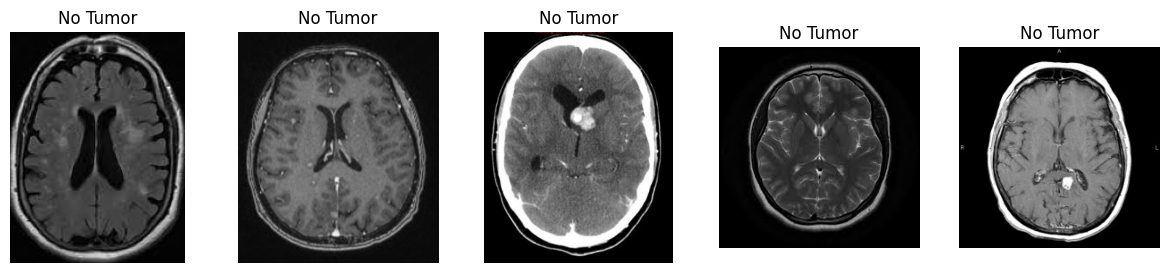

Sample image shape: (298, 260, 3)
Image data type: uint8


In [1]:
# Step 1: Data Loading & Exploration

import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Path to dataset (adjust if necessary for Kaggle environment)
dataset_path = "../input/brain-mri-images-for-brain-tumor-detection"
yes_dir = os.path.join(dataset_path, "yes")
no_dir = os.path.join(dataset_path, "no")

# List of files
yes_files = [f for f in os.listdir(yes_dir) if f.lower().endswith(('.jpg', '.png'))]
no_files = [f for f in os.listdir(no_dir) if f.lower().endswith(('.jpg', '.png'))]

# Basic stats
print(f"Number of tumor images: {len(yes_files)}")
print(f"Number of non-tumor images: {len(no_files)}")

# Class distribution
plt.figure(figsize=(5,4))
sns.barplot(x=['Tumor', 'No Tumor'], y=[len(yes_files), len(no_files)], palette="Greens_d")
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

# Function to show sample images from each class
def show_samples(class_dir, class_name, n=5):
    files = os.listdir(class_dir)
    plt.figure(figsize=(15, 3))
    for i in range(n):
        img_path = os.path.join(class_dir, files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

# Show samples from both classes
show_samples(yes_dir, "Tumor")
show_samples(no_dir, "No Tumor")

# Check one image shape & datatype
sample_img = cv2.imread(os.path.join(yes_dir, yes_files[0]))
print(f"Sample image shape: {sample_img.shape}")
print(f"Image data type: {sample_img.dtype}")
